## importing libraries and reading file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df=pd.read_csv("netflix.csv")

In [2]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s7281,Movie,Secret Obsession,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## count NaN in each columns

In [4]:
for col in list(netflix_df.columns):
    print(col, netflix_df[col].isnull().sum())
    

show_id 0
type 0
title 0
director 2634
cast 825
country 831
date_added 10
release_year 0
rating 4
duration 3
listed_in 0
description 0


## Finding 1

When rows with NaN value for rating column was checked, it was observed that, duration values were misplaced in the rating column. Rating values were the ones to be NaN. Hence columns were swapped for these 3 rows.

In [5]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [6]:
netflix_df.loc[netflix_df['duration'].isna(), 'duration'] = netflix_df.loc[netflix_df['duration'].isna(), 'rating']

# Now, update teh rating field as nan
netflix_df.loc[[5541, 5794, 5813], 'rating'] = np.nan

# check the data
netflix_df.loc[[5541, 5794, 5813], ['rating', 'duration']]

,rating,duration
5541,NaN,74 min
5794,NaN,84 min
5813,NaN,66 min


In [7]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
netflix_df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

## Filling or Removing NaN values

Entries where there are no director and country name would be dropped.

In [9]:
netflix_df.dropna(subset = ['director', 'country'], how='all', inplace = True)

Ratings with NaN are only a few compared to size of dataset. Hence those rows are dropped.

In [10]:
netflix_df.dropna(subset = ['rating'], how='all', inplace = True)

Date added with NaN are also only a few compared to the size of the dataset. Hence those rows are dropped.

In [11]:
netflix_df.dropna(subset = ['date_added'], how='all', inplace = True)

Directors and Cast with NaN values are labelled as "No Director" and "No Cast"

In [12]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)

In [13]:
#creating a new dataframe to split and explode cast data. Splitting and exploding cast coloumn gives a huge number of rows.
#Since I don't want to disturb the original dataframe where I split ande explode with directors, a copying is done.
#Hence, to show visualisations based on cast, cast_df is used
 
cast_df=netflix_df.copy()

In [14]:
cast_df['cast']=cast_df['cast'].str.split(',')

cast_df=cast_df.explode('cast')
cast_df['cast']=cast_df['cast'].str.strip()

In [15]:
director_df=netflix_df.copy()
director_df['director']=director_df['director'].str.split(',')
director_df=director_df.explode('director')
director_df['director']=director_df['director'].str.strip()

In [16]:
director_df['director'].value_counts()

No Director              2214
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Marcus Raboy               16
                         ... 
Raj Amit Kumar              1
Charles A. Nichols          1
Brandon Dickerson           1
John Michael McDonagh       1
Adam Randall                1
Name: director, Length: 4992, dtype: int64

In [17]:
cast_df['cast'].value_counts()

No Cast              729
Anupam Kher           43
Shah Rukh Khan        35
Naseeruddin Shah      32
Julie Tejwani         30
                    ... 
Dominic Deutscher      1
Deborah Grall          1
Derek Klena            1
Alex Harries           1
Rod Alexander          1
Name: cast, Length: 35401, dtype: int64

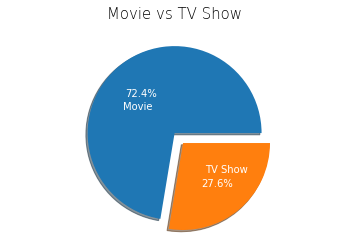

In [18]:
show_type = netflix_df['type'].value_counts()
show_type_label = ['Movie','TV Show']

plt.axis('equal')
plt.pie(show_type, labels = show_type_label, autopct = '%.1f%%', shadow=True, 
         textprops={'color':'white'},explode=[0, 0.15], labeldistance = 0.4)
plt.title('Movie vs TV Show', fontdict={'fontsize':15, 'fontweight':5})
plt.show()

In [22]:
country_df=netflix_df.copy()
country_df['country']=country_df['country'].str.split(',')

country_df=country_df.explode('country')
country_df['country']=country_df['country'].str.strip()

In [23]:
country_df['country'].value_counts()

United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
                  ... 
Panama               1
Azerbaijan           1
Mozambique           1
Lithuania            1
Liechtenstein        1
Name: country, Length: 123, dtype: int64

In [24]:
top_country = country_df['country'].value_counts().rename_axis('country').reset_index(name='unique_values').head(15)
top_country

,country,unique_values
0,United States,3681
1,India,1046
2,United Kingdom,805
3,Canada,445
4,France,393
5,Japan,316
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


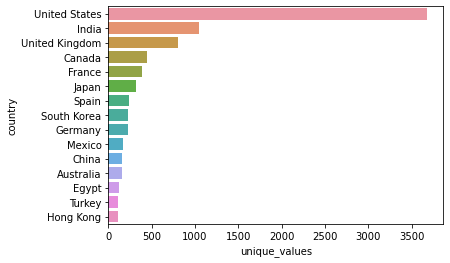

In [25]:
sns.barplot(y='country',x='unique_values',data=top_country,orient='h')
plt.show()

In [26]:
top_directors = director_df['director'].value_counts().rename_axis('director').reset_index(name='unique_values').head(16)
top_directors.drop(index=0,axis=0,inplace=True)
top_directors

,director,unique_values
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Youssef Chahine,12
10,Martin Scorsese,12


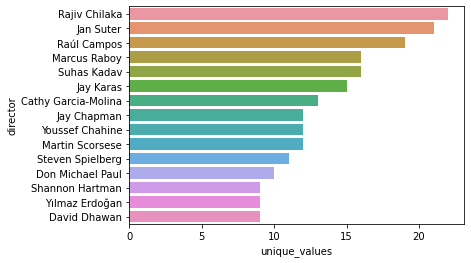

In [27]:
sns.barplot(y='director',x='unique_values',data=top_directors,orient='h')
plt.show()

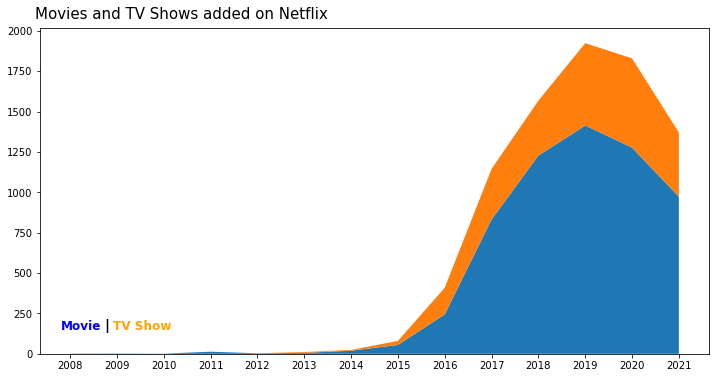

In [28]:
netflix_df['date_proper'] = pd.to_datetime(netflix_df['date_added'])

netflix_df['added_year'] = netflix_df['date_proper'].dt.year
netflix_df['added_year'].fillna(0, inplace = True)
netflix_df['added_year'] = netflix_df['added_year'].astype(int)

netflix_year_compare = netflix_df.copy()
netflix_year_compare.drop(['show_id', 'title', 'director', 'cast', 'country',
       'date_added', 'rating', 'duration', 'listed_in',
       'description', 'date_proper'], axis = 1, 
                          inplace = True)

add_year = netflix_year_compare.groupby('added_year').type.value_counts()
add_year = add_year.unstack().fillna(0)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.stackplot(add_year.index, add_year['Movie'], add_year['TV Show'])

fig.text(0.12, 0.9,'Movies and TV Shows added on Netflix', fontdict={'fontsize':15})

fig.text(0.15,0.18,"Movie", fontweight="bold", fontsize=12,color='blue')
fig.text(0.2,0.18,"|", fontweight="bold", fontsize=14, color='black')
fig.text(0.21,0.18,"TV Show", fontweight="bold", fontsize=12,color='orange')

plt.xticks(np.arange(2008, 2022, 1))

plt.show()
